In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

# Fetch historical data for BND and SPY
assets = ['BND', 'SPY']
data = yf.download(assets, start='2020-01-01', end='2023-01-01')
data['TSLA'] = np.random.normal(loc=700, scale=50, size=len(data))  # Replace with actual TSLA forecasted prices

/tmp/ipykernel_15149/860946852.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  2 of 2 completed


In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate expected returns
expected_returns = returns.mean() * 252  # Annualized returns
expected_returns['TSLA'] = 0.15  # Replace with your forecasted return for TSLA

# Calculate covariance matrix
cov_matrix = returns.cov() * 252  # Annualized covariance matrix

In [4]:
# Portfolio optimization functions
def portfolio_return(weights):
    return np.dot(weights, expected_returns)

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def negative_sharpe_ratio(weights):
    return - (portfolio_return(weights) / portfolio_volatility(weights))

def min_volatility(weights):
    return portfolio_volatility(weights)

In [5]:
# Constraints and bounds
num_assets = len(expected_returns)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Optimize for Maximum Sharpe Ratio Portfolio
initial_weights = num_assets * [1. / num_assets]
optimal_sharpe = minimize(negative_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
sharpe_weights = optimal_sharpe.x

# Optimize for Minimum Volatility Portfolio
optimal_volatility = minimize(min_volatility, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
volatility_weights = optimal_volatility.x

In [6]:
# Generate Efficient Frontier
returns_list = []
volatility_list = []
sharpe_ratios = []

for _ in range(10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns_list.append(portfolio_return(weights))
    volatility_list.append(portfolio_volatility(weights))
    sharpe_ratios.append(returns_list[-1] / volatility_list[-1])

# Convert lists to arrays
returns_array = np.array(returns_list)
volatility_array = np.array(volatility_list)
sharpe_ratios_array = np.array(sharpe_ratios)

Text(0.5, 1.0, 'Efficient Frontier')

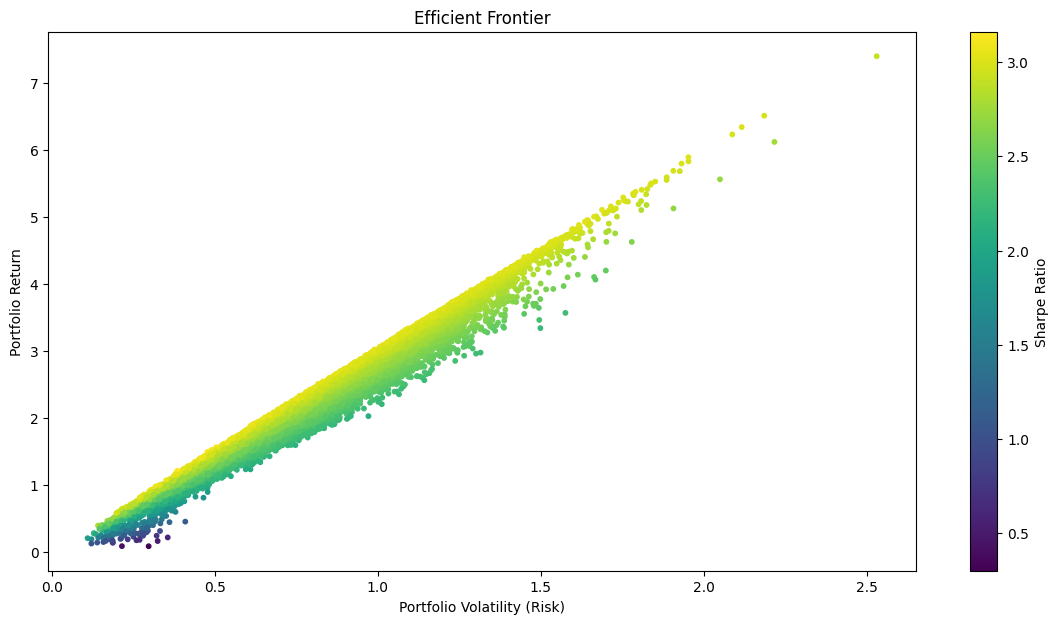

In [7]:
# Plotting the Efficient Frontier
plt.figure(figsize=(14, 7))
plt.scatter(volatility_array, returns_array, c=sharpe_ratios_array, cmap='viridis', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility (Risk)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')

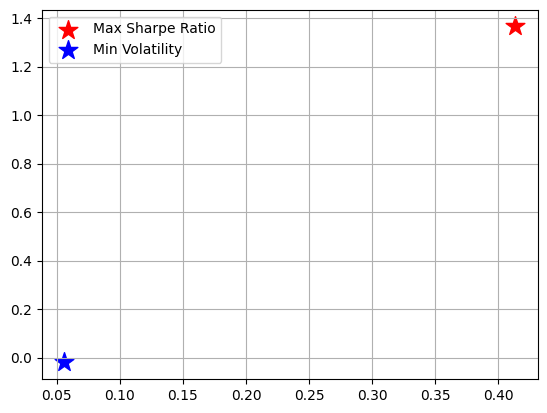

In [8]:
# Plot Maximum Sharpe Ratio Portfolio
max_sharpe_return = portfolio_return(sharpe_weights)
max_sharpe_volatility = portfolio_volatility(sharpe_weights)
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=200, label='Max Sharpe Ratio')

# Plot Minimum Volatility Portfolio
min_volatility_return = portfolio_return(volatility_weights)
min_volatility_value = portfolio_volatility(volatility_weights)
plt.scatter(min_volatility_value, min_volatility_return, color='blue', marker='*', s=200, label='Min Volatility')

plt.legend()
plt.grid()
plt.show()


In [ ]:
# Summary of recommended portfolio v
optimal_weights = {'TSLA': sharpe_weights[2], 'BND': sharpe_weights[0], 'SPY': sharpe_weights[1]}
expected_return = portfolio_return(sharpe_weights)
expected_volatility = portfolio_volatility(sharpe_weights)
sharpe_ratio = expected_return / expected_volatility

print("Recommended Portfolio Weights:")
print(optimal_weights)
print(f"Expected Annual Return: {expected_return:.2f}")
print(f"Expected Annual Volatility: {expected_volatility:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Recommended Portfolio Weights:
{'TSLA': np.float64(3.146201521208675e-17), 'BND': np.float64(5.0866080011272636e-17), 'SPY': np.float64(0.006493841828853584)}
Expected Annual Return: 1.37
Expected Annual Volatility: 0.41
Sharpe Ratio: 3.30
